## Calculating Determinants and Inverses

The determinant is a strange little process that I secretly believe is the outcome of someone doodling ontop of a matrix. <img src=https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcQYHjPg2uwDmSquWumWEcZLr2kGwC1EbFmyIb6_FKwEK2IgUqJdlofLuLk>

However from a coding perspective it is the perfect little exercise due to it's recursively defined nature. Here you see a 4x4 which still involves calculating the sub-determinants of 3x3 which will involve the determinants of 2x2s ... of course it bottoms out at our 1x1 determinant which is simply that value. <img src=https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcQM3uVmi5L2V1naptYQmFVSAVwjT15wpVQ7_2djbGlnXhK39qMa-A>

You might be familiar with the drill of what comes next, just run the cells below one after the other and everthing SHOULD be ok. CTRL-enter to run cell SHIFT-enter to run and select cell below.

In [1]:
from sympy import init_session
init_session()
import random,numpy

IPython console for SymPy 0.7.6.1 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


## Getting started

Here we just start by randomly generating a 4x4 Matrix. This time around the only zeros that show up here will be by chance so my code will not attempt to take advantage of these in order to speed up the calculation of the determinant.

In [2]:
my_mat = Matrix(4,4,[random.randrange(100) for i in range(16)])
pprint(my_mat)

⎡28  36  56  7 ⎤
⎢              ⎥
⎢4   96  38  40⎥
⎢              ⎥
⎢71  76  21  18⎥
⎢              ⎥
⎣70  69  42  99⎦


## Helper function 

Split mtx does exactly what it sounds like, it takes apart a matrix and sticks the parts back together. This is vital to the process of calculating a determinant because we literally have to pretend that the row and column of our current entry don't exist.

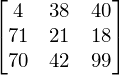

In [3]:
def split_mtx(mtx,row,col):
    mtx.row_del(row)
    mtx.col_del(col)
    return mtx

split_mtx(my_mat.copy(),0,1)

## Magic of recursive coding

I am going to do my best to describe what is happening in the recurse function, but inevitably I will fail because even when you have already wrapped your head around what's going on in the recursive definition of a function, looking at someone's code for it is almost but not quite entirely different. 

All I'm trying to communicate is that if you don't know entirely what's happening below, don't freak out.

So we start with the base case of the recursive function: when the matrix is only a single entry, simply return the value of the entry.
    if len(mtx) == 1:
        print("bottom of recurse")
        pprint(mtx)
        return mtx[0] 

Now if we don't satisfy that base case, we will recurse over the entries of the first column. Each column entry will be multiplied by the determinant (recursive call here) of the sub matrix (split and reformed). If the column index value is not even, we tack on a negative sign. The Final note here is that we are storing these values inside of a list that can then just be summed together to give us the eventual determinant value. 


In [4]:
def recurse_det(mtx):
    if len(mtx) == 1:
        print("bottom of recurse")
        pprint(mtx)
        return mtx[0] 
    else:
        pprint(mtx)
        return sum([mtx[0,j]*recurse_det(split_mtx(mtx.copy(),0,j)) if j%2 == 0 else
                    -mtx[0,j]*recurse_det(split_mtx(mtx.copy(),0,j))
                    for j in range(mtx.cols)])
    
print(recurse_det(my_mat))
print(my_mat.det())


stripping
⎡61  30  35  0 ⎤
⎢              ⎥
⎢85  89  82  38⎥
⎢              ⎥
⎢74  44  52  53⎥
⎢              ⎥
⎣13  63  18  16⎦
stripping
⎡89  82  38⎤
⎢          ⎥
⎢44  52  53⎥
⎢          ⎥
⎣63  18  16⎦
stripping
⎡52  53⎤
⎢      ⎥
⎣18  16⎦
bottom of recurse
[16]
bottom of recurse
[18]
stripping
⎡44  53⎤
⎢      ⎥
⎣63  16⎦
bottom of recurse
[16]
bottom of recurse
[63]
stripping
⎡44  52⎤
⎢      ⎥
⎣63  18⎦
bottom of recurse
[18]
bottom of recurse
[63]
stripping
⎡85  82  38⎤
⎢          ⎥
⎢74  52  53⎥
⎢          ⎥
⎣13  18  16⎦
stripping
⎡52  53⎤
⎢      ⎥
⎣18  16⎦
bottom of recurse
[16]
bottom of recurse
[18]
stripping
⎡74  53⎤
⎢      ⎥
⎣13  16⎦
bottom of recurse
[16]
bottom of recurse
[13]
stripping
⎡74  52⎤
⎢      ⎥
⎣13  18⎦
bottom of recurse
[18]
bottom of recurse
[13]
stripping
⎡85  89  38⎤
⎢          ⎥
⎢74  44  53⎥
⎢          ⎥
⎣13  63  16⎦
stripping
⎡44  53⎤
⎢      ⎥
⎣63  16⎦
bottom of recurse
[16]
bottom of recurse
[63]
stripping
⎡74  53⎤
⎢      ⎥
⎣13  16⎦
bottom of recurse
[16]
botto

if you are interested you might decide to try to see how this code performs on larger square matrices. One of the drawbacks of recursion in  general is that it begins to incur serious performance issues because the scale of the calculations it is performing grows exponentially.

Fortunately there are other ways to calculate a determinant.


## The RREF answer to life

I say this in jest because it seems that RREF can be used in Linear Algebra for just about anything. So, not surprisingly, we can use it to calculate the determinant of a matrix as it goes through the steps of the Algorithm.

If you haven't already done so, please refer to the RREF and Elementary Matrix notebooks because I will be drawing upon information shared there.

I will be using a pseudo determinant that has its starting value set to one.

Several of the row operations change this thing we are considering the pseudo_determinant of a matrix: the swapping of two rows multiplies the pseudo_determinant by -1, and the multiplication of a row by some scalar multiplies the pseudo_determinant by that same value.

The another piece of the puzzle here is that an invertible matrix in RREF will have ones along a diagonal from the top left to the bottom right (see below for details) and the pseudo_determinant of such a matrix is simply the multiplication of the entries in this diagonal (conveniently equals 1). Finally we take the inverse of our pseudo_det and it should be equal to the recursively derived value from above.

So, trust me that the only changes that have been made to the RREF functions below are to allow for the tracking of changes that have happened to the pseudo_determinant. Running the cell below will start to spit out RREF'd randomly generated matrices, but with the added information relating to their determinants. Feel free to use **CTRL-C** to end the barrage of calculations when you are convinced.

In [ ]:
# %load "./RREF_det.py"
from __future__ import division
import random
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing()
import ipdb

pseudo_det = 1
def target_swap(mtx,row,lst):
    ret_mtx = mtx.copy()
    rep_ind = find_nonzero_ind(lst,row)
    if rep_ind:
        rep_row = ret_mtx[rep_ind,:]
        ret_mtx[rep_ind,:] = ret_mtx[row,:]
        ret_mtx[row,:] =rep_row
        return ret_mtx
    return False

def find_nonzero_ind(lst,row,backwards=False):
    if backwards:
        lst_to_bool = [x == 0 if i < row else True for i,x in enumerate(lst)]
    else:
        lst_to_bool = [x == 0 if i > row else True for i,x in enumerate(lst)]
    if False not in lst_to_bool:
        return False
    return lst_to_bool.index(False)

def add_mult_row(mtx,piv_row,other):
    return solve(piv_row*x+ other,x)[0]

def grab_diag(mtx):
    d = 1
    for i in range(mtx.rows):
        d*=mtx[i,i]
    return d
def give_pseudo_det():
    global pseudo_det
    if pseudo_det == 0:
        return 0
    else:
        return 1/pseudo_det

def shortEF(mtx):
    global pseudo_det
    pivots = []
    cop = mtx.copy()
    row,col = 0,0
    try_cap = cop.rows + 30
    while row < cop.rows and col < cop.cols: #took off -1 from cop.rows mighthave broken stuff
        col_list = list(cop[:,col])
        if try_cap < 0:
            return (row,col)
        if col_list.count(0) == cop.rows or col_list[row:].count(0) > cop.rows -1 -row:
            col +=1
            continue
        if cop[row,col] == 0 :
                #cop = rolling_rep(cop,row)
                cop = target_swap(cop,row,col_list)
                try_cap -=1
                pseudo_det *= -1
                continue
        if col_list[row:].count(0) == cop.rows -1 -row:
            pivots.append((row,col))
            col +=1
            row +=1
            continue
        else:
            
            rep_ind = find_nonzero_ind(col_list,row) #makes sure to not include the potential pivot row in the search but keeps the indexing constant with mtx
            multiple_factor = add_mult_row(cop,cop[row,col],cop[rep_ind,col])
            cop[rep_ind,:] += cop[row,:]*multiple_factor
    reduce_row(cop,pivots)
    return cop

def reduce_row(mtx,pivot_lst):
    pivot_lst.reverse()
    for row,col in pivot_lst:
        global pseudo_det
        pseudo_det /= mtx[row,col]
        mtx[row,:] = mtx[row,:]/mtx[row,col]
        col_list = list(mtx[:,col])
        while col_list.count(0) < mtx.rows -1:
            rep_ind = find_nonzero_ind(col_list,row,True) #makes sure to not include the potential pivot row in the search but keeps the indexing constant with mtx
            multiple_factor = add_mult_row(mtx,mtx[row,col],mtx[rep_ind,col])
            mtx[rep_ind,:] += mtx[row,:]*multiple_factor
            col_list = list(mtx[:,col])
    pseudo_det *= grab_diag(mtx)

    

def main ():
    global pseudo_det
    serious_trbl_mkrs = []
    runs = 200
    for i in range(runs):
        pseudo_det = 1
        trbl_mkr = Matrix(4,4,[random.randrange(1,100) if random.randrange(1,5) < 3 else 0 for num in range(16)])
        if shortEF(trbl_mkr) != trbl_mkr.rref()[0]:
            serious_trbl_mkrs.append(trbl_mkr)
        print(give_pseudo_det(),trbl_mkr.det())
    pprint(serious_trbl_mkrs)
    if len(serious_trbl_mkrs)/runs == 0.0:
        print('no incorrect RREFS')

if __name__ == "__main__":
    #main()
    ipdb.runcall(main)
    


## Invertibility

The final topic of this notebook is Invertibility. Some matrices have it, others want it (maybe?), and this is how to tell them apart. Like I explained above, RREF is your best shot for understanding whether you have a real invertible matrix. Trusting that you have actually consulted the Elementary Matrix notebook we start by tacking an identity matrix of the same number of rows onto the right side of a matrix we are interested in. 

From here we simply pass the whole thing through the RREF Algorithm, and by the end we will split the double wide matrix to find that the matrix on the right (originally the identity) has become a nasty looking set of fractions. This Matrix is a special matrix we often denote with the -1 power indicating that if it is multiplied with the starting matrix we will get back the identity matrix. This is similar to saying $$14*14^{-1} = 1$$
$$mtx*mtx^{-1} = I $$



In [9]:
my_mat = Matrix(4,4,[random.randrange(100) if random.randrange(5) > 1 else 0 for i in range(16)])


def add_to_mtx(original,addition):
    for col in range(addition.shape[1]):
        original = original.col_insert(original.cols,addition[:,col])
    return original


def calculate_inverse(mtx):
    row,col = mtx.shape
    if row != col:
        print('not invertible')
        return mtx
    else:
        extended_mtx = add_to_mtx(mtx,eye(mtx.shape[0]))
        inv = RREF_real.shortEF(extended_mtx)[:,mtx.shape[1]:]
        return inv
inv = calculate_inverse(my_mat)

And behold the fruits of our (my) labor!

In [10]:
pprint(my_mat)
pprint(inv)
pprint(my_mat*inv)

⎡42  0   83  0 ⎤
⎢              ⎥
⎢52  0   0   67⎥
⎢              ⎥
⎢21  95  6   18⎥
⎢              ⎥
⎣82  50  34  50⎦
⎡-19631   -31955   -27805    105659 ⎤
⎢───────  ───────  ───────  ─────── ⎥
⎢1261952  1261952  1261952  2523904 ⎥
⎢                                   ⎥
⎢ -135    -11127    72263   -22209  ⎥
⎢───────  ───────  ───────  ────────⎥
⎢1261952  6309760  6309760  12619520⎥
⎢                                   ⎥
⎢12569     8085     7035    -26733  ⎥
⎢──────   ──────   ──────   ─────── ⎥
⎢630976   630976   630976   1261952 ⎥
⎢                                   ⎥
⎢ 3809    10909     5395    -20501  ⎥
⎢──────   ──────   ──────   ─────── ⎥
⎣315488   315488   315488    630976 ⎦
⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦
